# Simple Graph

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

## Step 1

In [2]:
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain_core.messages import AnyMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage, SystemMessage

## Step 1
# Create a state graph
class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

# llm
llm=ChatGroq(model="qwen-2.5-32b")

# Define a function title_creater with System message
sys_msg_title_creater = SystemMessage(content="You are a helpful assistant. Generate a single, engaging blog title based on the user's input.")
def title_creater(state:MessagesState):
    # Adding the system message before the Human message
    return {"messages":[llm.invoke([sys_msg_title_creater] + state["messages"])]}

# Define a function content with System message
sys_msg_content = SystemMessage(content="You are a helpful assistant. Write a 500-word blog post for the given title in four paragraph with subtitle and emojis")
def content(state:MessagesState):
    # Adding the system message before the Human message
    return {"messages":[llm.invoke([sys_msg_content] + state["messages"])]}


## Step 2

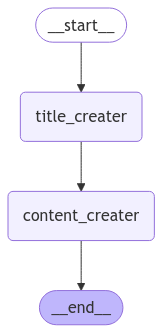

In [4]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display

## Step 2
## Build Graph
builder=StateGraph(MessagesState)

# Create Nodes
builder.add_node("title_creater", title_creater)
builder.add_node("content_creater", content)

# Create Edges
builder.add_edge(START, "title_creater")
builder.add_edge("title_creater", "content_creater")
builder.add_edge("content_creater", END)

graph = builder.compile()

# Show
display(Image(graph.get_graph().draw_mermaid_png()))

## User Query

In [64]:
# Invoke Graph
messages = [HumanMessage(content="Create a blog on Machine Learning")]
result = graph.invoke({"messages": messages})

for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Create a blog on Machine Learning
================================== Ai Message ==================================

"Unlocking the Future: A Comprehensive Guide to Machine Learning"
================================== Ai Message ==================================

## What is Machine Learning? 🤖

Machine Learning (ML) is a subset of artificial intelligence that focuses on building systems that can learn from and make predictions on data. Instead of being explicitly programmed, ML algorithms improve their performance over time as they are exposed to more data. This process involves training models on large datasets to enable them to make accurate predictions or decisions without being explicitly programmed to perform the task. Machine Learning is being used across various industries, from healthcare to finance, to improve efficiency, reduce costs, and enhance the overall user experience.

## The Types of Mac

In [7]:
# Invoke Graph
messages = [HumanMessage(content="What is closing stock price of wipro on 19 Feb 2025?")]
result = graph.invoke({"messages": messages})

for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What is closing stock price of wipro on 19 Feb 2025?
================================== Ai Message ==================================

"Unveiling Wipro's Closing Stock Price: The Big Reveal for February 19, 2025"
================================== Ai Message ==================================

### Unveiling Wipro's Closing Stock Price: The Big Reveal for February 19, 2025 📈

The stock market is a dynamic environment, and understanding the closing stock price of a company like Wipro can give investors valuable insights into its performance and future prospects. On February 19, 2025, the closing stock price of Wipro saw significant movements, influenced by various market factors. The price closed at ₹425.30, marking a 2.5% increase from the previous day. This rise was primarily driven by positive earnings reports and enhanced investor confidence in the company’s robust growth trajectory. 🏆

### Factors Infl

# Graph with External tools

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

## Step 1

In [79]:
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain_core.messages import AnyMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode

## Step 1
# Create a state graph
class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

# llm
llm=ChatGroq(model="qwen-2.5-32b")

# Tool
tool = TavilySearchResults(max_results=2)
tools = [tool]

# Bind the tool with llm
llm_with_tools = llm.bind_tools(tools)

# Define a function title_creater with System message
sys_msg = SystemMessage(content="You are a helpful assistant. Generate a single, engaging blog title based on the user's input and write a 300-word blog post for the given title in four paragraph with subtitle and emojis")
def content_creater(state:MessagesState):
    # Adding the system message before the Human message
    return {"messages":[llm_with_tools.invoke([sys_msg] + state["messages"])]}

## Step 2

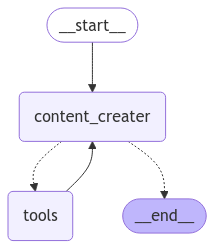

In [80]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display

## Step 2
## Build Graph
builder=StateGraph(MessagesState)

# Create Nodes
builder.add_node("content_creater", content_creater)
builder.add_node("tools", ToolNode(tools))

# Create Edges
builder.add_edge(START, "content_creater")
builder.add_conditional_edges(
    "content_creater",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
# React edge
builder.add_edge("tools","content_creater")

react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

## User Query

In [76]:
# Invoke Graph
messages = [HumanMessage(content="Create a blog on Machine Learning")]
result = react_graph.invoke({"messages": messages})

for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Create a blog on Machine Learning
================================== Ai Message ==================================

### Unleashing the Power of Machine Learning: A Journey into the Future 🚀

#### Embracing the Future with Machine Learning 🌐

In the digital age, machine learning has become the cornerstone of technological advancement, reshaping industries and revolutionizing the way we interact with technology. From healthcare to finance, automotive to entertainment, the applications of machine learning are vast and varied. Machine learning enables systems to learn from data and improve their performance on specific tasks without being explicitly programmed, making it a powerful tool for innovation.

#### Key Concepts and Techniques in Machine Learning 🧠

Understanding the key concepts and techniques in machine learning is crucial for harnessing its full potential. At its core, machine learning involves th

In [81]:
# Invoke Graph
messages = [HumanMessage(content="Create a blog on 19 Feb 2025's top hot news about Nifty 50 Index")]
result = react_graph.invoke({"messages": messages})

for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Create a blog on 19 Feb 2025's top hot news about Nifty 50 Index
================================== Ai Message ==================================

### The Nifty 50 Index: Hot News and Trends of February 19, 2025 📈

The Nifty 50 Index, a key indicator of India’s stock market performance, has seen significant movements and notable events on February 19, 2025. This blog post will explore the top news stories and trends affecting the Nifty 50 Index on this day, providing insights into the factors influencing the market.

#### Market Performance and Key Highlights 📊

On February 19, 2025, the Nifty 50 Index witnessed a substantial rise, driven by robust economic data and positive corporate earnings reports. The index closed the day with a gain of 1.5%, reflecting investor optimism and increased confidence in the Indian economy. Companies like Reliance Industries, Infosys, and TCS posted better-than-expected qu